In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud,ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LinearRegression, Lasso,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('DataAnalyst.csv')

In [3]:
df.head(10)

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   
5           5                                       Data Analyst   
6           6                       Business/Data Analyst (FP&A)   
7           7                               Data Science Analyst   
8           8                                       Data Analyst   
9           9                      Data Analyst, Merchant Health   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   
5  $37K-$66K (Glassdoor est.)   
6  $37K-$66K (Glassdoor est.)   
7  $37K-$66K (Glassdoor est.)   
8  $37K-$66K (Glassdoor est.)   
9  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
5  About Cubist\nCubist Systematic Strategies is ...     3.9   
6  Two Sigma is a different kind of investment ma...     4.4   
7  Data Science Analyst\n\nJob Details\nLevel\nEx...     3.7   
8  The Data Analyst is an integral member of the ...     4.0   
9  About Us\n\nRiskified is the AI platform power...     4.4   

                              Company Name      Location  \
0           Vera Institute of Justice\n3.2  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY   
2                         Squarespace\n3.4  New York, NY   
3                            Celerity\n4.1  New York, NY   
4                             FanDuel\n3.9  New York, NY   
5                             Point72\n3.9  New York, NY   
6                           Two Sigma\n4.4  New York, NY   
7             GNY Insurance Companies\n3.7  New York, NY   
8                                DMGT\n4.0  New York, NY   
9                           Riskified\n4.4  New York, NY   

             Headquarters                     Size  Founded  \
0            New York, NY     201 to 500 employees     1961   
1            New York, NY         10000+ employees     1893   
2            New York, NY   1001 to 5000 employees     2003   
3              McLean, VA     201 to 500 employees     2002   
4            New York, NY    501 to 1000 employees     2009   
5            Stamford, CT   1001 to 5000 employees     2014   
6            New York, NY   1001 to 5000 employees     2001   
7            New York, NY     201 to 500 employees     1914   
8  London, United Kingdom  5001 to 10000 employees     1896   
9            New York, NY    501 to 1000 employees     2013   

                Type of ownership                               Industry  \
0          Nonprofit Organization                      Social Assistance   
1          Nonprofit Organization       Health Care Services & Hospitals   
2               Company - Private                               Internet   
3  Subsidiary or Business Segment                            IT Services   
4               Company - Private                    Sports & Recreation   
5               Company - Private  Investment Banking & Asset Management   
6               Company - Private  Investment Banking & Asset Management   
7               Company - Private                     Insurance Carriers   
8                Company - Public       Venture Capital & Private Equity   
9               Company - Private                 Research & Developme

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
Unnamed: 0           2253 non-null int64
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 281.7+ KB


In [5]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [6]:
df.describe()

Unnamed: 0       Rating      Founded
count   2253.0000  2253.000000  2253.000000
mean    1126.0000     3.160630  1398.522858
std      650.5294     1.665228   901.929251
min        0.0000    -1.000000    -1.000000
25%      563.0000     3.100000    -1.000000
50%     1126.0000     3.600000  1979.000000
75%     1689.0000     4.000000  2002.000000
max     2252.0000     5.000000  2019.000000

In [7]:
df['Salary Estimate'].value_counts()

$41K-$78K (Glassdoor est.)      57
$42K-$76K (Glassdoor est.)      57
$50K-$86K (Glassdoor est.)      41
$35K-$67K (Glassdoor est.)      33
$60K-$124K (Glassdoor est.)     31
$58K-$93K (Glassdoor est.)      31
$43K-$76K (Glassdoor est.)      31
$97K-$129K (Glassdoor est.)     30
$51K-$88K (Glassdoor est.)      30
$30K-$53K (Glassdoor est.)      30
$43K-$69K (Glassdoor est.)      30
$60K-$110K (Glassdoor est.)     30
$46K-$87K (Glassdoor est.)      30
$98K-$114K (Glassdoor est.)     30
$27K-$52K (Glassdoor est.)      30
$37K-$66K (Glassdoor est.)      30
$35K-$42K (Glassdoor est.)      30
$51K-$87K (Glassdoor est.)      30
$64K-$113K (Glassdoor est.)     30
$37K-$68K (Glassdoor est.)      30
$42K-$66K (Glassdoor est.)      30
$46K-$86K (Glassdoor est.)      30
$59K-$85K (Glassdoor est.)      30
$60K-$66K (Glassdoor est.)      30
$69K-$127K (Glassdoor est.)     30
$43K-$94K (Glassdoor est.)      29
$110K-$190K (Glassdoor est.)    29
$51K-$93K (Glassdoor est.)      29
$73K-$82K (Glassdoor

In [8]:
df['Salary Estimate'].shape

(2253,)

In [9]:
df = df[df['Salary Estimate'] != '-1']
df['Salary Estimate'].shape

(2252,)

In [10]:
df.dropna(inplace = True)
df.head(10)

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   
5           5                                       Data Analyst   
6           6                       Business/Data Analyst (FP&A)   
7           7                               Data Science Analyst   
8           8                                       Data Analyst   
9           9                      Data Analyst, Merchant Health   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   
5  $37K-$66K (Glassdoor est.)   
6  $37K-$66K (Glassdoor est.)   
7  $37K-$66K (Glassdoor est.)   
8  $37K-$66K (Glassdoor est.)   
9  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
5  About Cubist\nCubist Systematic Strategies is ...     3.9   
6  Two Sigma is a different kind of investment ma...     4.4   
7  Data Science Analyst\n\nJob Details\nLevel\nEx...     3.7   
8  The Data Analyst is an integral member of the ...     4.0   
9  About Us\n\nRiskified is the AI platform power...     4.4   

                              Company Name      Location  \
0           Vera Institute of Justice\n3.2  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY   
2                         Squarespace\n3.4  New York, NY   
3                            Celerity\n4.1  New York, NY   
4                             FanDuel\n3.9  New York, NY   
5                             Point72\n3.9  New York, NY   
6                           Two Sigma\n4.4  New York, NY   
7             GNY Insurance Companies\n3.7  New York, NY   
8                                DMGT\n4.0  New York, NY   
9                           Riskified\n4.4  New York, NY   

             Headquarters                     Size  Founded  \
0            New York, NY     201 to 500 employees     1961   
1            New York, NY         10000+ employees     1893   
2            New York, NY   1001 to 5000 employees     2003   
3              McLean, VA     201 to 500 employees     2002   
4            New York, NY    501 to 1000 employees     2009   
5            Stamford, CT   1001 to 5000 employees     2014   
6            New York, NY   1001 to 5000 employees     2001   
7            New York, NY     201 to 500 employees     1914   
8  London, United Kingdom  5001 to 10000 employees     1896   
9            New York, NY    501 to 1000 employees     2013   

                Type of ownership                               Industry  \
0          Nonprofit Organization                      Social Assistance   
1          Nonprofit Organization       Health Care Services & Hospitals   
2               Company - Private                               Internet   
3  Subsidiary or Business Segment                            IT Services   
4               Company - Private                    Sports & Recreation   
5               Company - Private  Investment Banking & Asset Management   
6               Company - Private  Investment Banking & Asset Management   
7               Company - Private                     Insurance Carriers   
8                Company - Public       Venture Capital & Private Equity   
9               Company - Private                 Research & Developme

In [11]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [12]:
df.drop(columns = ['Unnamed: 0','Easy Apply'],axis = 1, inplace = True)

### Salary Parsing

In [13]:
df['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)     57
$41K-$78K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$58K-$93K (Glassdoor est.)     31
$60K-$124K (Glassdoor est.)    31
$43K-$76K (Glassdoor est.)     31
$43K-$69K (Glassdoor est.)     30
$35K-$42K (Glassdoor est.)     30
$51K-$87K (Glassdoor est.)     30
$98K-$114K (Glassdoor est.)    30
$37K-$66K (Glassdoor est.)     30
$30K-$53K (Glassdoor est.)     30
$46K-$86K (Glassdoor est.)     30
$27K-$52K (Glassdoor est.)     30
$60K-$110K (Glassdoor est.)    30
$64K-$113K (Glassdoor est.)    30
$69K-$127K (Glassdoor est.)    30
$59K-$85K (Glassdoor est.)     30
$60K-$66K (Glassdoor est.)     30
$42K-$66K (Glassdoor est.)     30
$37K-$68K (Glassdoor est.)     30
$97K-$129K (Glassdoor est.)    30
$46K-$87K (Glassdoor est.)     30
$51K-$88K (Glassdoor est.)     30
$38K-$68K (Glassdoor est.)     29
$24K-$48K (Glassdoor est.)     29
$29K-$38K (Glassdoor est.)     29
$73K-$82K (Glassdoor est.)     29
$43K-$94K (Gla

In [14]:
df['Salary Estimate'].dropna(inplace = True)
df['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)     57
$41K-$78K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$58K-$93K (Glassdoor est.)     31
$60K-$124K (Glassdoor est.)    31
$43K-$76K (Glassdoor est.)     31
$43K-$69K (Glassdoor est.)     30
$35K-$42K (Glassdoor est.)     30
$51K-$87K (Glassdoor est.)     30
$98K-$114K (Glassdoor est.)    30
$37K-$66K (Glassdoor est.)     30
$30K-$53K (Glassdoor est.)     30
$46K-$86K (Glassdoor est.)     30
$27K-$52K (Glassdoor est.)     30
$60K-$110K (Glassdoor est.)    30
$64K-$113K (Glassdoor est.)    30
$69K-$127K (Glassdoor est.)    30
$59K-$85K (Glassdoor est.)     30
$60K-$66K (Glassdoor est.)     30
$42K-$66K (Glassdoor est.)     30
$37K-$68K (Glassdoor est.)     30
$97K-$129K (Glassdoor est.)    30
$46K-$87K (Glassdoor est.)     30
$51K-$88K (Glassdoor est.)     30
$38K-$68K (Glassdoor est.)     29
$24K-$48K (Glassdoor est.)     29
$29K-$38K (Glassdoor est.)     29
$73K-$82K (Glassdoor est.)     29
$43K-$94K (Gla

In [15]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
print(df['Salary Estimate'])

0        $37K-$66K 
1        $37K-$66K 
2        $37K-$66K 
3        $37K-$66K 
4        $37K-$66K 
5        $37K-$66K 
6        $37K-$66K 
7        $37K-$66K 
8        $37K-$66K 
9        $37K-$66K 
10       $37K-$66K 
11       $37K-$66K 
12       $37K-$66K 
13       $37K-$66K 
14       $37K-$66K 
15       $37K-$66K 
16       $37K-$66K 
17       $37K-$66K 
18       $37K-$66K 
19       $37K-$66K 
20       $37K-$66K 
21       $37K-$66K 
22       $37K-$66K 
23       $37K-$66K 
24       $37K-$66K 
25       $37K-$66K 
26       $37K-$66K 
27       $37K-$66K 
28       $37K-$66K 
29       $37K-$66K 
           ...     
2223    $57K-$100K 
2224    $57K-$100K 
2225    $57K-$100K 
2226    $57K-$100K 
2227    $57K-$100K 
2228    $57K-$100K 
2229    $57K-$100K 
2230    $57K-$100K 
2231    $57K-$100K 
2232    $57K-$100K 
2233    $57K-$100K 
2234    $57K-$100K 
2235    $57K-$100K 
2236    $57K-$100K 
2237    $57K-$100K 
2238    $78K-$104K 
2239    $78K-$104K 
2240    $78K-$104K 
2241    $78K-$104K 


In [16]:
df['Salary Estimate'].str.split('-')

0        [$37K, $66K ]
1        [$37K, $66K ]
2        [$37K, $66K ]
3        [$37K, $66K ]
4        [$37K, $66K ]
5        [$37K, $66K ]
6        [$37K, $66K ]
7        [$37K, $66K ]
8        [$37K, $66K ]
9        [$37K, $66K ]
10       [$37K, $66K ]
11       [$37K, $66K ]
12       [$37K, $66K ]
13       [$37K, $66K ]
14       [$37K, $66K ]
15       [$37K, $66K ]
16       [$37K, $66K ]
17       [$37K, $66K ]
18       [$37K, $66K ]
19       [$37K, $66K ]
20       [$37K, $66K ]
21       [$37K, $66K ]
22       [$37K, $66K ]
23       [$37K, $66K ]
24       [$37K, $66K ]
25       [$37K, $66K ]
26       [$37K, $66K ]
27       [$37K, $66K ]
28       [$37K, $66K ]
29       [$37K, $66K ]
             ...      
2223    [$57K, $100K ]
2224    [$57K, $100K ]
2225    [$57K, $100K ]
2226    [$57K, $100K ]
2227    [$57K, $100K ]
2228    [$57K, $100K ]
2229    [$57K, $100K ]
2230    [$57K, $100K ]
2231    [$57K, $100K ]
2232    [$57K, $100K ]
2233    [$57K, $100K ]
2234    [$57K, $100K ]
2235    [$5

In [17]:
# Replacing the '$' and 'k'
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x : x.replace('K','').replace('$',''))
df['Salary Estimate']

0        37-66 
1        37-66 
2        37-66 
3        37-66 
4        37-66 
5        37-66 
6        37-66 
7        37-66 
8        37-66 
9        37-66 
10       37-66 
11       37-66 
12       37-66 
13       37-66 
14       37-66 
15       37-66 
16       37-66 
17       37-66 
18       37-66 
19       37-66 
20       37-66 
21       37-66 
22       37-66 
23       37-66 
24       37-66 
25       37-66 
26       37-66 
27       37-66 
28       37-66 
29       37-66 
         ...   
2223    57-100 
2224    57-100 
2225    57-100 
2226    57-100 
2227    57-100 
2228    57-100 
2229    57-100 
2230    57-100 
2231    57-100 
2232    57-100 
2233    57-100 
2234    57-100 
2235    57-100 
2236    57-100 
2237    57-100 
2238    78-104 
2239    78-104 
2240    78-104 
2241    78-104 
2242    78-104 
2243    78-104 
2244    78-104 
2245    78-104 
2246    78-104 
2247    78-104 
2248    78-104 
2249    78-104 
2250    78-104 
2251    78-104 
2252    78-104 
Name: Salary Estimate, L

In [18]:
df

Job Title Salary Estimate  \
0     Data Analyst, Center on Immigration and Justic...          37-66    
1                                  Quality Data Analyst          37-66    
2     Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                          Data Analyst          37-66    
4                                Reporting Data Analyst          37-66    
5                                          Data Analyst          37-66    
6                          Business/Data Analyst (FP&A)          37-66    
7                                  Data Science Analyst          37-66    
8                                          Data Analyst          37-66    
9                         Data Analyst, Merchant Health          37-66    
10                                         Data Analyst          37-66    
11                                         Data Analyst          37-66    
12                                         DATA ANALYST          37-66    
13                                  Senior Data Analyst          37-66    
14                     Investment Advisory Data Analyst          37-66    
15                          Sustainability Data Analyst          37-66    
16                                         Data Analyst          37-66    
17                                Clinical Data Analyst          37-66    
18                              DATA PROGRAMMER/ANALYST          37-66    
19                                         Data Analyst          37-66    
20                        Product Analyst, Data Science          37-66    
21                                 Data Science Analyst          37-66    
22                       Data Analyst - Intex Developer          37-66    
23                                         Data Analyst          37-66    
24                       Entry Level / Jr. Data Analyst          37-66    
25                                         Data Analyst          37-66    
26                 Data + Business Intelligence Analyst          37-66    
27                                Data Analyst, Product          37-66    
28                             Data Analyst Entry Level          37-66    
29                                         Data Analyst          37-66    
...                                                 ...             ...   
2223                          Data Analyst - Aurora, IL         57-100    
2224                              Data Security Analyst         57-100    
2225                                    Sr Data Analyst         57-100    
2226                              Data Analyst - Junior         57-100    
2227                       Data Base Programmer/Analyst         57-100    
2228                       Senior Business/Data Analyst         57-100    
2229                           Application Data Analyst         57-100    
2230               Data Analyst-(Remote- All across US)         57-100    
2231                                    Sr Data Analyst         57-100    
2232               Business Data Analyst III - RQS 2018         57-100    
2233            Configuration & Data Management Analyst         57-100    
2234   Data Analyst 3, Customer Experience - Centennial         57-100    
2235                       Data Base Programmer/Analyst         57-100    
2236                   Senior Health Data Analyst (SAS)         57-100    
2237        ColdFusion Development Data Analyst -Remote         57-100    
2238                       Senior Contract Data Analyst         78-104    
2239                       Senior Contract Data Analyst         78-104    
2240  RQS - IHHA - 201900004460 -1s Data Security An...         78-104    
2241                           Data Security Analyst fr         78-104    
2242                      Business Systems Analyst-Data         78-104    
2243                   Data Analyst-(Remote- All across         78-104    
2244                          Data Security Analyst, Sr         78-104 

In [19]:
df['Salary Estimate'].describe()

count       2251
unique        89
top       42-76 
freq          57
Name: Salary Estimate, dtype: object

In [20]:
df['Salary Estimate'].value_counts()

42-76      57
41-78      57
50-86      41
35-67      33
43-76      31
60-124     31
58-93      31
30-53      30
46-87      30
69-127     30
42-66      30
43-69      30
97-129     30
27-52      30
37-68      30
51-88      30
37-66      30
35-42      30
60-66      30
51-87      30
64-113     30
46-86      30
98-114     30
59-85      30
60-110     30
37-70      29
53-94      29
29-38      29
37-44      29
73-82      29
           ..
57-100     27
48-88      27
55-101     27
57-67      26
53-104     26
47-74      26
53-99      25
93-159     25
48-96      22
63-116     20
50-93      19
40-72      19
73-89      18
49-112     18
84-90      18
68-87      16
78-104     15
73-127     14
44-78      12
45-78      11
45-88      11
40-74       9
30-54       8
32-56       4
31-59       4
42-63       4
47-81       3
36-67       3
43-77       3
57-70       2
Name: Salary Estimate, Length: 89, dtype: int64

In [21]:
df['Min Salary'] = df['Salary Estimate'].apply(lambda x : x.split('-')[0])
df['Min Salary'].head(3)

0    37
1    37
2    37
Name: Min Salary, dtype: object

In [22]:
df['Max Salary'] = df['Salary Estimate'].apply(lambda x : x.split('-')[1])
df['Max Salary'].head(5)

0    66 
1    66 
2    66 
3    66 
4    66 
Name: Max Salary, dtype: object

In [23]:
# Changing the Data type from Object to Integer
df[['Min Salary','Max Salary']] = df[['Min Salary','Max Salary']].apply(pd.to_numeric)
df['Min Salary'].dtype

dtype('int64')

In [24]:
df['Average Salary'] = (df['Min Salary']+df['Max Salary'])/2
df['Average Salary'] = df['Average Salary'].astype('int64')
df['Average Salary'].dtype

dtype('int64')

In [25]:
df['Company Name'] = df['Company Name'].str.slice(stop=-4)

In [26]:
df.head(10)

Job Title Salary Estimate  \
0  Data Analyst, Center on Immigration and Justic...          37-66    
1                               Quality Data Analyst          37-66    
2  Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                       Data Analyst          37-66    
4                             Reporting Data Analyst          37-66    
5                                       Data Analyst          37-66    
6                       Business/Data Analyst (FP&A)          37-66    
7                               Data Science Analyst          37-66    
8                                       Data Analyst          37-66    
9                      Data Analyst, Merchant Health          37-66    

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
5  About Cubist\nCubist Systematic Strategies is ...     3.9   
6  Two Sigma is a different kind of investment ma...     4.4   
7  Data Science Analyst\n\nJob Details\nLevel\nEx...     3.7   
8  The Data Analyst is an integral member of the ...     4.0   
9  About Us\n\nRiskified is the AI platform power...     4.4   

                         Company Name      Location            Headquarters  \
0           Vera Institute of Justice  New York, NY            New York, NY   
1  Visiting Nurse Service of New York  New York, NY            New York, NY   
2                         Squarespace  New York, NY            New York, NY   
3                            Celerity  New York, NY              McLean, VA   
4                             FanDuel  New York, NY            New York, NY   
5                             Point72  New York, NY            Stamford, CT   
6                           Two Sigma  New York, NY            New York, NY   
7             GNY Insurance Companies  New York, NY            New York, NY   
8                                DMGT  New York, NY  London, United Kingdom   
9                           Riskified  New York, NY            New York, NY   

                      Size  Founded               Type of ownership  \
0     201 to 500 employees     1961          Nonprofit Organization   
1         10000+ employees     1893          Nonprofit Organization   
2   1001 to 5000 employees     2003               Company - Private   
3     201 to 500 employees     2002  Subsidiary or Business Segment   
4    501 to 1000 employees     2009               Company - Private   
5   1001 to 5000 employees     2014               Company - Private   
6   1001 to 5000 employees     2001               Company - Private   
7     201 to 500 employees     1914               Company - Private   
8  5001 to 10000 employees     1896                Company - Public   
9    501 to 1000 employees     2013               Company - Private   

                                Industry                            Sector  \
0                      Social Assistance                        Non-Profit   
1       Health Care Services & Hospitals                       Health Care   
2                               Internet            Information Technology   
3                            IT Services            Information Technology   
4                    Sports & Recreation  Arts, Entertainment & Recreation   
5  Investment Banking & Asset Management                           Finance   
6  Investment Banking & Asset Management                           Finance   
7                     Insurance Carriers                         Insurance   
8       Venture Capital & Private Equity                           Finance   
9                 Research & Development                 Business Services   

                      Revenue     

In [27]:
df['State'] = df['Location'].str.slice(start=-3)
df['State']

0        NY
1        NY
2        NY
3        NY
4        NY
5        NY
6        NY
7        NY
8        NY
9        NY
10       NY
11       NJ
12       NY
13       NY
14       NJ
15       NY
16       NY
17       NY
18       NY
19       NY
20       NY
21       NY
22       NY
23       NY
24       NY
25       NY
26       NY
27       NY
28       NY
29       NY
       ... 
2223     CO
2224     CO
2225     CO
2226     CO
2227     CO
2228     CO
2229     CO
2230     CO
2231     CO
2232     CO
2233     CO
2234     CO
2235     CO
2236     CO
2237     CO
2238     CO
2239     CO
2240     CO
2241     CO
2242     CO
2243     CO
2244     CO
2245     CO
2246     CO
2247     CO
2248     CO
2249     CO
2250     CO
2251     CO
2252     CO
Name: State, Length: 2251, dtype: object

In [28]:
df['Location'] = df['Location'].str.slice(stop=-4)
df['Location']

0                          New York
1                          New York
2                          New York
3                          New York
4                          New York
5                          New York
6                          New York
7                          New York
8                          New York
9                          New York
10                         New York
11                        Fairfield
12                         New York
13                         New York
14                      Jersey City
15                         New York
16                         New York
17                         New York
18                         New York
19                         New York
20                         New York
21                         New York
22                         New York
23                         New York
24                         New York
25                         New York
26                         New York
27                         N

In [29]:
df['State'].value_counts()

 CA    626
 TX    394
 NY    345
 IL    164
 PA    114
 AZ     97
 CO     96
 NC     89
 NJ     86
 WA     53
 VA     48
 OH     35
 UT     33
 FL     27
 IN     23
 DE     11
 GA      4
 KS      3
 SC      3
Name: State, dtype: int64

In [30]:
df['Location'].value_counts()

New York             310
Chicago              130
San Francisco        119
Austin                81
Los Angeles           80
Charlotte             78
Houston               72
Dallas                66
San Diego             62
Philadelphia          56
Denver                47
San Antonio           45
San Jose              38
Phoenix               35
Jersey City           33
Tempe                 31
Seattle               30
Irving                29
Columbus              29
Plano                 28
Santa Clara           22
Salt Lake City        22
Jacksonville          19
El Segundo            19
San Mateo             18
Norfolk               18
Indianapolis          17
Burbank               17
Fort Worth            16
Sunnyvale             16
                    ... 
Queens Village         1
Cedar Park             1
Staten Island          1
Lone Tree              1
Woodbridge             1
Itasca                 1
Whitestown             1
Inglewood              1
Hermosa Beach          1


In [31]:
df['HQ_State'] = df['Headquarters'].str.slice(start =-3)
df['HQ_State']

0        NY
1        NY
2        NY
3        VA
4        NY
5        CT
6        NY
7        NY
8       dom
9        NY
10       NY
11       -1
12       NY
13       NY
14       AZ
15       NY
16       NY
17       NY
18       MA
19       NY
20       CA
21       CA
22      lia
23       MI
24       OH
25       CA
26       PA
27       NY
28       NY
29       DC
       ... 
2223     IL
2224     OR
2225     CO
2226     IL
2227     VA
2228     MD
2229     VA
2230     LA
2231     TX
2232     GA
2233     MD
2234     PA
2235     VA
2236     IA
2237     CO
2238     VA
2239     -1
2240     GA
2241     GA
2242     PA
2243     LA
2244     GA
2245     VA
2246     -1
2247     CA
2248     GA
2249     CO
2250     -1
2251     OH
2252     CO
Name: HQ_State, Length: 2251, dtype: object

In [32]:
df['HQ_State'] = df['HQ_State'].replace('-1','Nan')
df['HQ_State']

0        NY
1        NY
2        NY
3        VA
4        NY
5        CT
6        NY
7        NY
8       dom
9        NY
10       NY
11      Nan
12       NY
13       NY
14       AZ
15       NY
16       NY
17       NY
18       MA
19       NY
20       CA
21       CA
22      lia
23       MI
24       OH
25       CA
26       PA
27       NY
28       NY
29       DC
       ... 
2223     IL
2224     OR
2225     CO
2226     IL
2227     VA
2228     MD
2229     VA
2230     LA
2231     TX
2232     GA
2233     MD
2234     PA
2235     VA
2236     IA
2237     CO
2238     VA
2239    Nan
2240     GA
2241     GA
2242     PA
2243     LA
2244     GA
2245     VA
2246    Nan
2247     CA
2248     GA
2249     CO
2250    Nan
2251     OH
2252     CO
Name: HQ_State, Length: 2251, dtype: object

In [33]:
df['Headquarters'] = df['Headquarters'].str.slice(stop=-4)

In [34]:
df['Same_State'] = df.apply(lambda x : 1 if x.HQ_State==x.State  else 0, axis = 1)

In [35]:
df

Job Title Salary Estimate  \
0     Data Analyst, Center on Immigration and Justic...          37-66    
1                                  Quality Data Analyst          37-66    
2     Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                          Data Analyst          37-66    
4                                Reporting Data Analyst          37-66    
5                                          Data Analyst          37-66    
6                          Business/Data Analyst (FP&A)          37-66    
7                                  Data Science Analyst          37-66    
8                                          Data Analyst          37-66    
9                         Data Analyst, Merchant Health          37-66    
10                                         Data Analyst          37-66    
11                                         Data Analyst          37-66    
12                                         DATA ANALYST          37-66    
13                                  Senior Data Analyst          37-66    
14                     Investment Advisory Data Analyst          37-66    
15                          Sustainability Data Analyst          37-66    
16                                         Data Analyst          37-66    
17                                Clinical Data Analyst          37-66    
18                              DATA PROGRAMMER/ANALYST          37-66    
19                                         Data Analyst          37-66    
20                        Product Analyst, Data Science          37-66    
21                                 Data Science Analyst          37-66    
22                       Data Analyst - Intex Developer          37-66    
23                                         Data Analyst          37-66    
24                       Entry Level / Jr. Data Analyst          37-66    
25                                         Data Analyst          37-66    
26                 Data + Business Intelligence Analyst          37-66    
27                                Data Analyst, Product          37-66    
28                             Data Analyst Entry Level          37-66    
29                                         Data Analyst          37-66    
...                                                 ...             ...   
2223                          Data Analyst - Aurora, IL         57-100    
2224                              Data Security Analyst         57-100    
2225                                    Sr Data Analyst         57-100    
2226                              Data Analyst - Junior         57-100    
2227                       Data Base Programmer/Analyst         57-100    
2228                       Senior Business/Data Analyst         57-100    
2229                           Application Data Analyst         57-100    
2230               Data Analyst-(Remote- All across US)         57-100    
2231                                    Sr Data Analyst         57-100    
2232               Business Data Analyst III - RQS 2018         57-100    
2233            Configuration & Data Management Analyst         57-100    
2234   Data Analyst 3, Customer Experience - Centennial         57-100    
2235                       Data Base Programmer/Analyst         57-100    
2236                   Senior Health Data Analyst (SAS)         57-100    
2237        ColdFusion Development Data Analyst -Remote         57-100    
2238                       Senior Contract Data Analyst         78-104    
2239                       Senior Contract Data Analyst         78-104    
2240  RQS - IHHA - 201900004460 -1s Data Security An...         78-104    
2241                           Data Security Analyst fr         78-104    
2242                      Business Systems Analyst-Data         78-104    
2243                   Data Analyst-(Remote- All across         78-104    
2244                          Data Security Analyst, Sr         78-104 

In [36]:
df['Same_State'].value_counts()

0    1304
1     947
Name: Same_State, dtype: int64

In [37]:
df['Founded'].value_counts()

-1       659
 2008     80
 1996     54
 2000     54
 2002     54
 1999     53
 1998     51
 2011     47
 2004     47
 1997     46
 2013     34
 2001     34
 1995     34
 1966     32
 2014     31
 2007     31
 2012     30
 2010     29
 2005     29
 2015     28
 1990     28
 2006     27
 1994     27
 2003     24
 2016     22
 1992     20
 1984     19
 2018     19
 1983     19
 1991     18
        ... 
 1832      1
 1850      1
 1856      1
 1785      1
 1928      1
 1898      1
 1897      1
 1807      1
 1853      1
 1857      1
 1865      1
 1875      1
 1885      1
 1887      1
 1891      1
 1893      1
 1895      1
 1905      1
 1931      1
 1958      1
 1909      1
 1917      1
 1934      1
 1789      1
 1926      1
 1924      1
 1922      1
 1918      1
 1908      1
 1682      1
Name: Founded, Length: 161, dtype: int64

In [38]:
df['Founded']= df['Founded'].replace(-1,'Nan')
df['Founded'].value_counts()

Nan     659
2008     80
1996     54
2000     54
2002     54
1999     53
1998     51
2011     47
2004     47
1997     46
2013     34
2001     34
1995     34
1966     32
2014     31
2007     31
2012     30
2010     29
2005     29
1990     28
2015     28
1994     27
2006     27
2003     24
2016     22
1992     20
2018     19
1983     19
1984     19
2017     18
       ... 
1922      1
1828      1
1822      1
1818      1
1928      1
1682      1
1931      1
1785      1
1807      1
1853      1
1917      1
1856      1
1908      1
1897      1
1891      1
1898      1
1958      1
1887      1
1905      1
1885      1
1880      1
1857      1
1876      1
1875      1
1909      1
1872      1
1865      1
1893      1
1918      1
1789      1
Name: Founded, Length: 161, dtype: int64

In [39]:
df

Job Title Salary Estimate  \
0     Data Analyst, Center on Immigration and Justic...          37-66    
1                                  Quality Data Analyst          37-66    
2     Senior Data Analyst, Insights & Analytics Team...          37-66    
3                                          Data Analyst          37-66    
4                                Reporting Data Analyst          37-66    
5                                          Data Analyst          37-66    
6                          Business/Data Analyst (FP&A)          37-66    
7                                  Data Science Analyst          37-66    
8                                          Data Analyst          37-66    
9                         Data Analyst, Merchant Health          37-66    
10                                         Data Analyst          37-66    
11                                         Data Analyst          37-66    
12                                         DATA ANALYST          37-66    
13                                  Senior Data Analyst          37-66    
14                     Investment Advisory Data Analyst          37-66    
15                          Sustainability Data Analyst          37-66    
16                                         Data Analyst          37-66    
17                                Clinical Data Analyst          37-66    
18                              DATA PROGRAMMER/ANALYST          37-66    
19                                         Data Analyst          37-66    
20                        Product Analyst, Data Science          37-66    
21                                 Data Science Analyst          37-66    
22                       Data Analyst - Intex Developer          37-66    
23                                         Data Analyst          37-66    
24                       Entry Level / Jr. Data Analyst          37-66    
25                                         Data Analyst          37-66    
26                 Data + Business Intelligence Analyst          37-66    
27                                Data Analyst, Product          37-66    
28                             Data Analyst Entry Level          37-66    
29                                         Data Analyst          37-66    
...                                                 ...             ...   
2223                          Data Analyst - Aurora, IL         57-100    
2224                              Data Security Analyst         57-100    
2225                                    Sr Data Analyst         57-100    
2226                              Data Analyst - Junior         57-100    
2227                       Data Base Programmer/Analyst         57-100    
2228                       Senior Business/Data Analyst         57-100    
2229                           Application Data Analyst         57-100    
2230               Data Analyst-(Remote- All across US)         57-100    
2231                                    Sr Data Analyst         57-100    
2232               Business Data Analyst III - RQS 2018         57-100    
2233            Configuration & Data Management Analyst         57-100    
2234   Data Analyst 3, Customer Experience - Centennial         57-100    
2235                       Data Base Programmer/Analyst         57-100    
2236                   Senior Health Data Analyst (SAS)         57-100    
2237        ColdFusion Development Data Analyst -Remote         57-100    
2238                       Senior Contract Data Analyst         78-104    
2239                       Senior Contract Data Analyst         78-104    
2240  RQS - IHHA - 201900004460 -1s Data Security An...         78-104    
2241                           Data Security Analyst fr         78-104    
2242                      Business Systems Analyst-Data         78-104    
2243                   Data Analyst-(Remote- All across         78-104    
2244                          Data Security Analyst, Sr         78-104 

In [40]:
df['Job Title'].value_counts()

Data Analyst                                                                                                          404
Senior Data Analyst                                                                                                    90
Junior Data Analyst                                                                                                    30
Business Data Analyst                                                                                                  28
Sr. Data Analyst                                                                                                       21
Data Analyst Junior                                                                                                    17
Data Analyst II                                                                                                        17
Data Quality Analyst                                                                                                   17
Data Governance Analyst 

In [41]:
def job_title(title):
    if 'data analyst' in title.lower():
        return 'data analyst'
    elif 'business data analyst' in title.lower():
        return 'bda'
    elif 'machine learning' in title.lower():
        return 'mda'
    elif 'data scientist'in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'de'
    elif 'manager' in title.lower():
        return'manager'
    else:
        return 'nan'
def seniortiy(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead'in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr'in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'nan'

In [42]:
df['Jobs'] = df['Job Title'].apply(job_title)
df['Jobs'].value_counts()

data analyst      1670
nan                550
data scientist      14
de                  11
manager              6
Name: Jobs, dtype: int64

In [43]:
df['Senior_Jobs'] = df['Job Title'].apply(seniortiy)
df['Senior_Jobs'].value_counts()

nan       1704
senior     474
junior      73
Name: Senior_Jobs, dtype: int64

In [44]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [45]:
df['Desc_len'] = df['Job Description'].apply(lambda x : len(x))

In [46]:
df.describe()

Rating   Min Salary   Max Salary  Average Salary   Same_State  \
count  2251.000000  2251.000000  2251.000000     2251.000000  2251.000000   
mean      3.161928    54.267437    89.975122       71.886717     0.420702   
std       1.663451    19.579706    29.321502       23.640682     0.493781   
min      -1.000000    24.000000    38.000000       33.000000     0.000000   
25%       3.100000    41.000000    70.000000       58.000000     0.000000   
50%       3.600000    50.000000    87.000000       69.000000     0.000000   
75%       4.000000    64.000000   104.000000       80.000000     1.000000   
max       5.000000   113.000000   190.000000      150.000000     1.000000   

          num_comp      Desc_len  
count  2251.000000   2251.000000  
mean      0.609507   3120.365615  
std       1.148479   1858.823549  
min       0.000000      5.000000  
25%       0.000000   1760.500000  
50%       0.000000   2883.000000  
75%       0.000000   4119.000000  
max       4.000000  18664.000000

Text(0.5, 0, 'Average Salary')

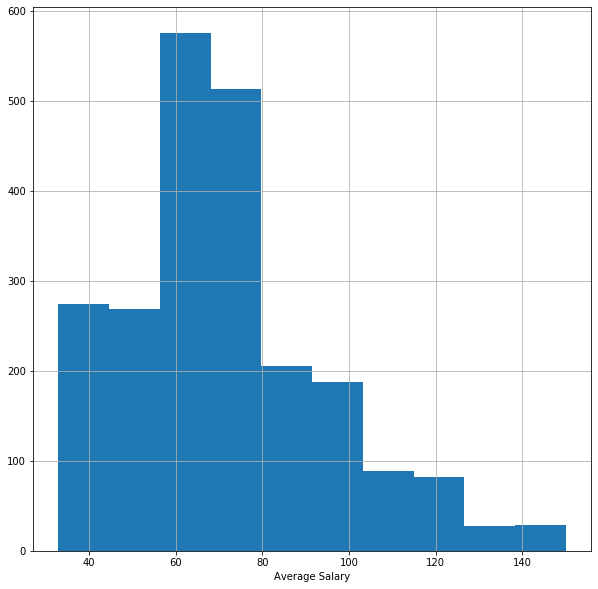

In [47]:
plt.figure(figsize=(10,10))
df['Average Salary'].hist()
plt.xlabel('Average Salary')

Text(0, 0.5, 'No. of Description')

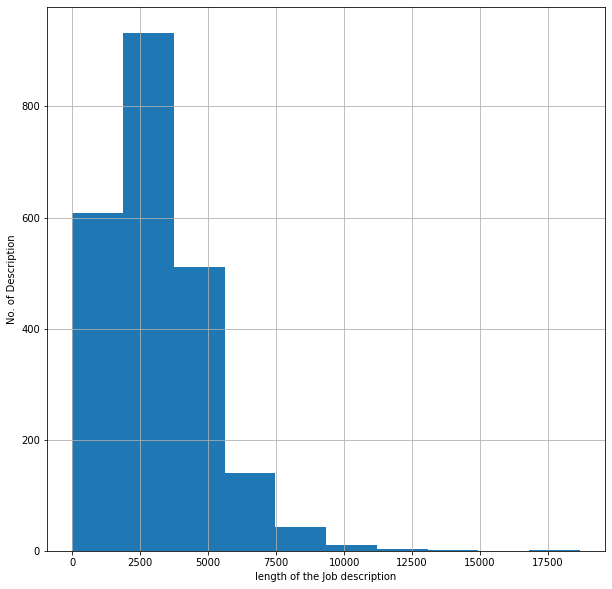

In [48]:
plt.figure(figsize=(10,10))
df['Desc_len'].hist()
plt.xlabel('length of the Job description')
plt.ylabel('No. of Description')

Text(0.5, 0, 'State')

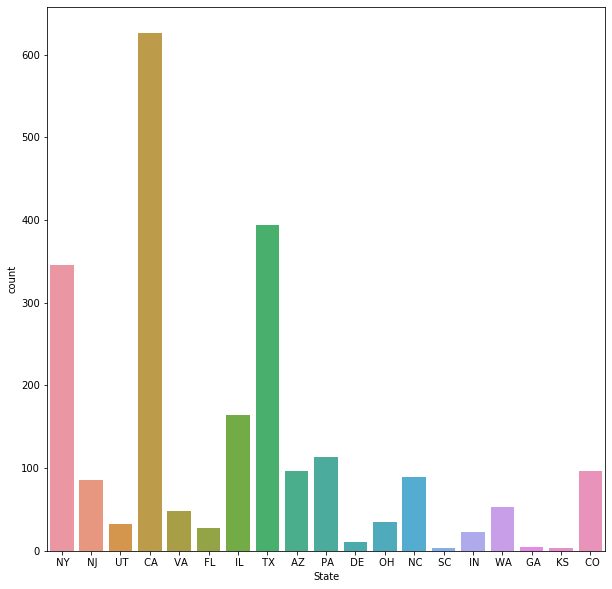

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(df['State'])
plt.xlabel('State')

Text(0.5, 0, 'Location')

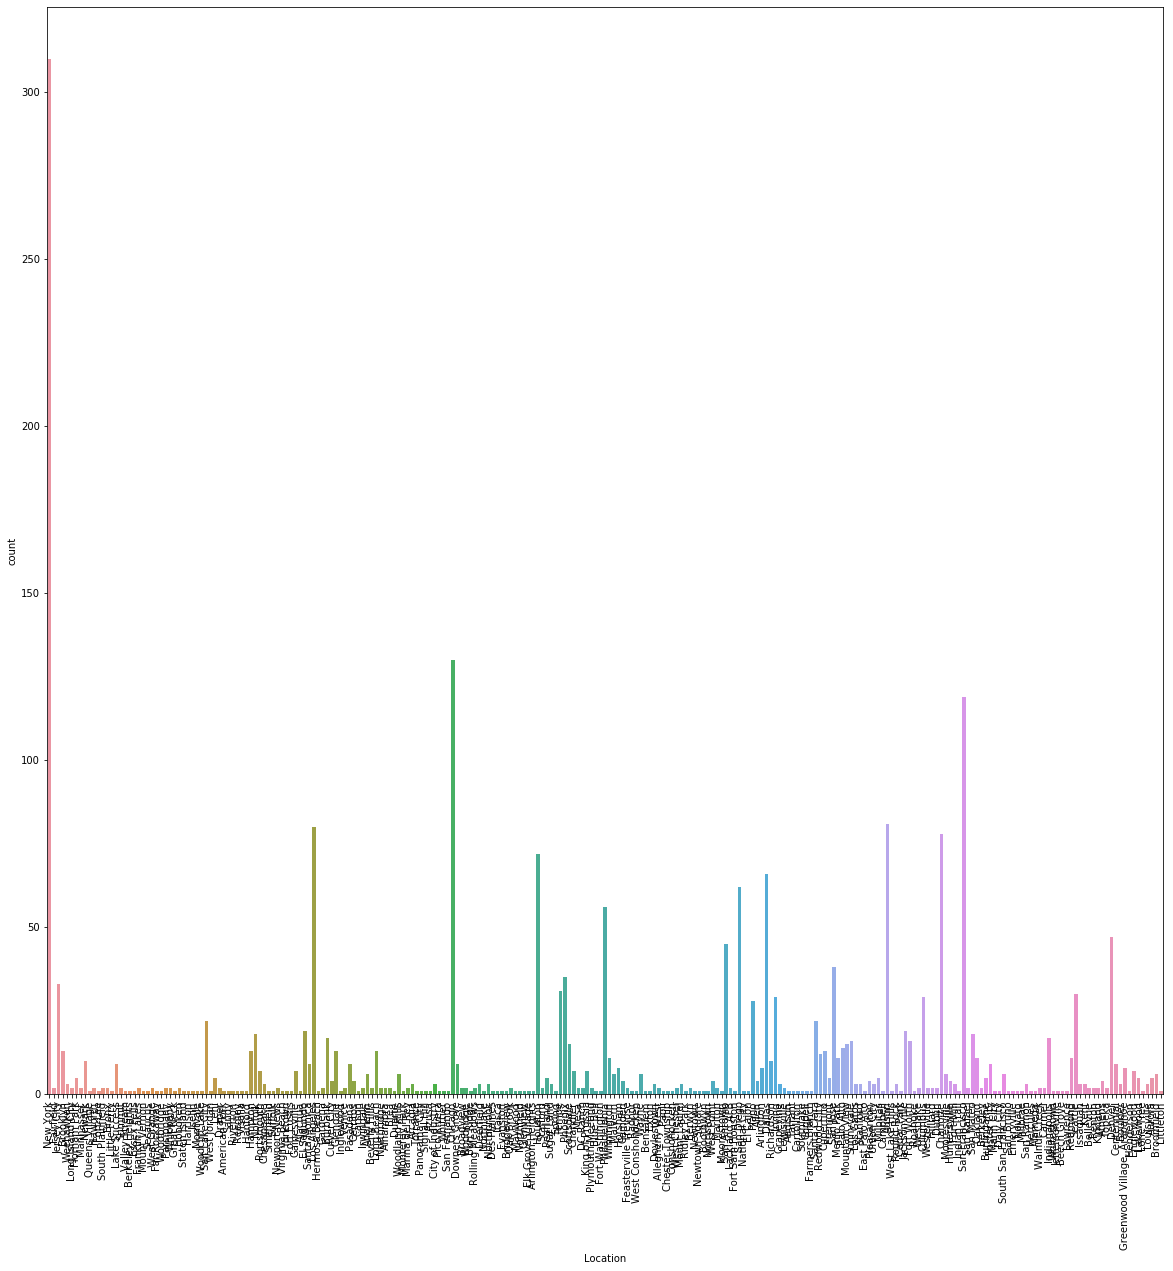

In [50]:
plt.figure(figsize=(20,20))
sns.countplot(df['Location'])
plt.xticks(rotation=90)
plt.xlabel('Location')

Text(0.5, 0, 'HQ_State')

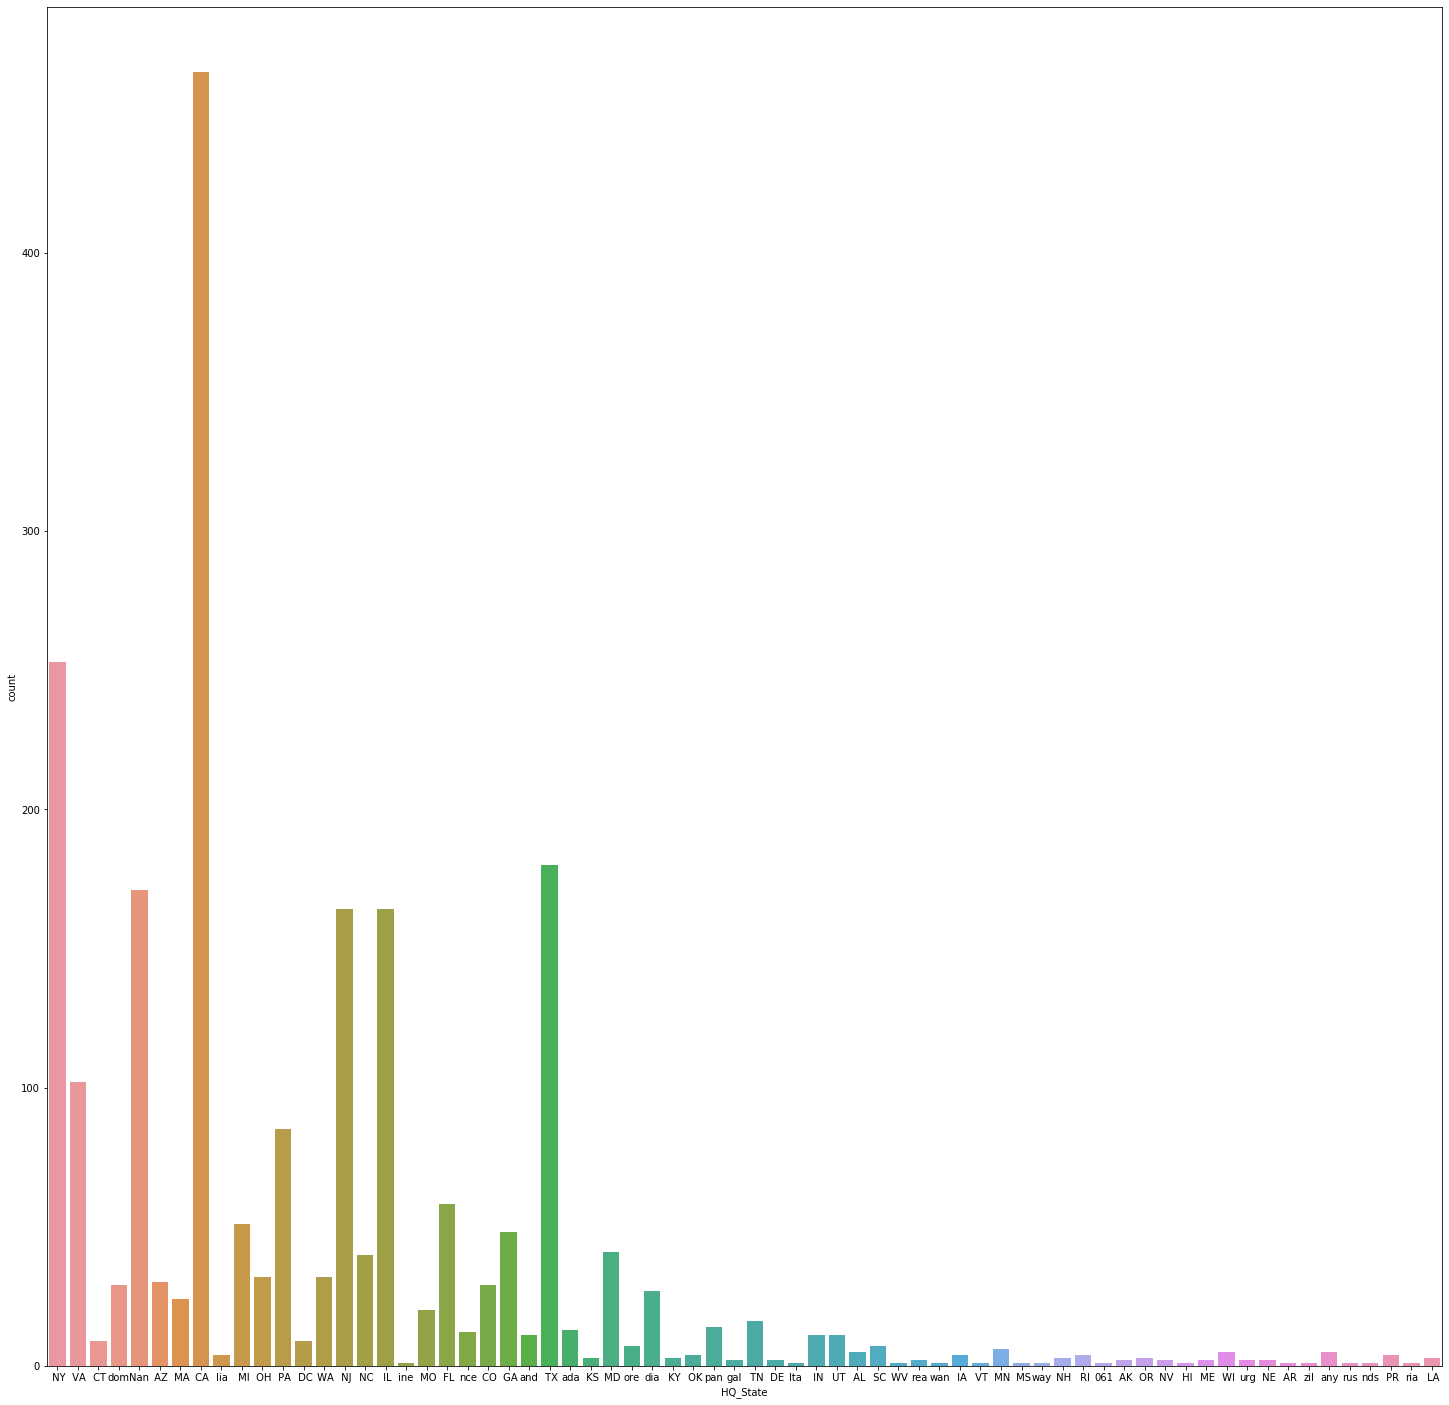

In [51]:
plt.figure(figsize=(25,25))
sns.countplot(df['HQ_State'])
plt.xlabel('HQ_State')

Text(0.5, 0, 'Founded')

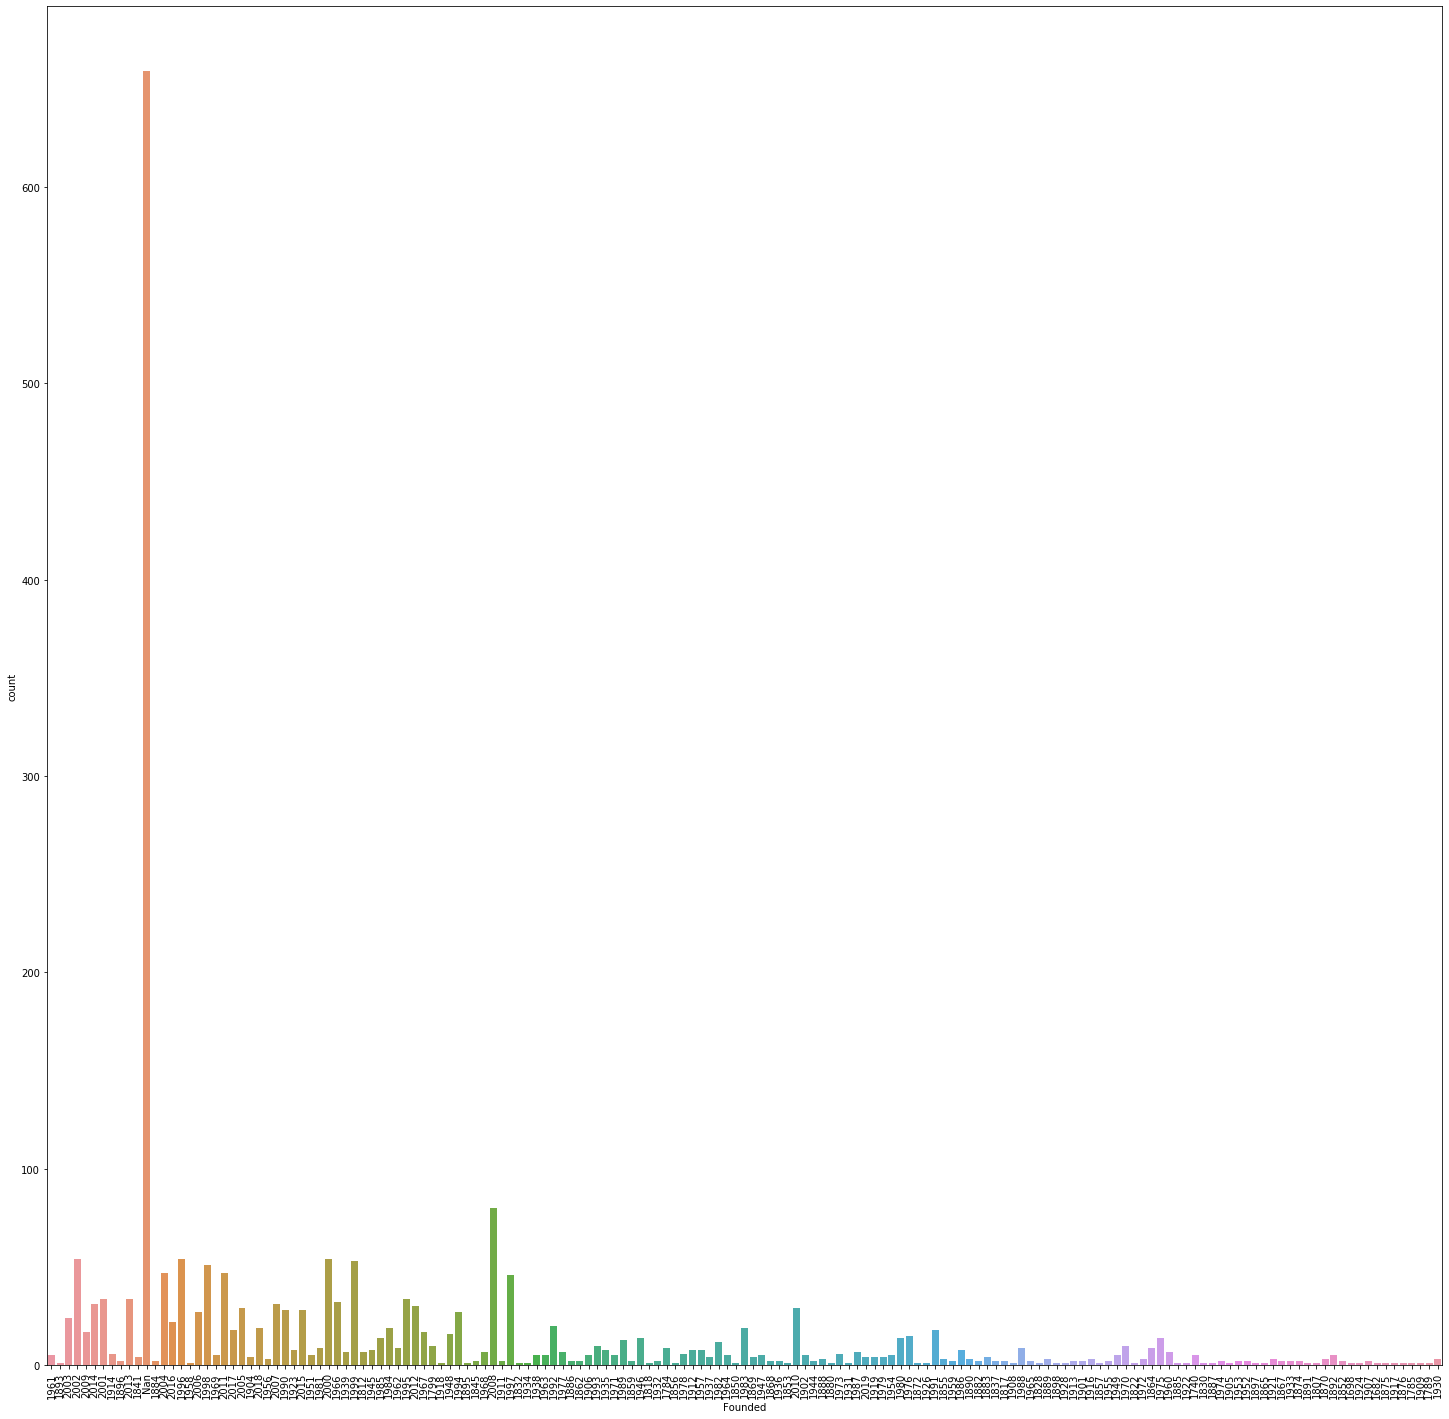

In [52]:
plt.figure(figsize=(25,25))
sns.countplot(df['Founded'])
plt.xticks(rotation=90)
plt.xlabel('Founded')

Text(0.5, 0, 'same_State')

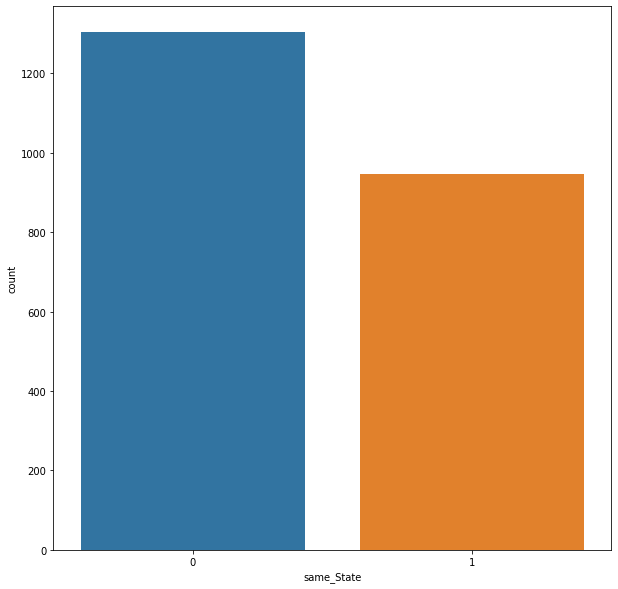

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(df['Same_State'])
plt.xlabel('same_State')

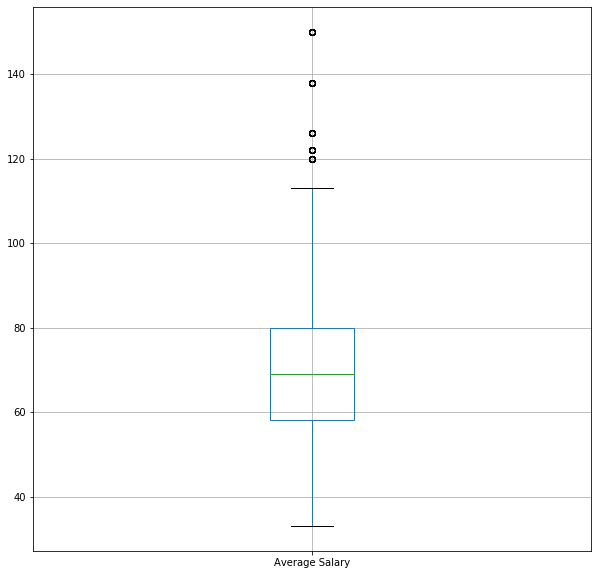

In [54]:
plt.figure(figsize=(10,10))
df.boxplot(column=['Average Salary'])
plt.show()

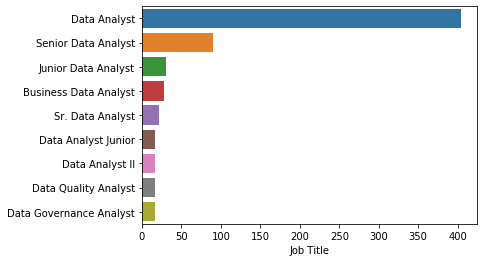

In [55]:
sns.barplot(x=df['Job Title'].value_counts()[0:9],y=df['Job Title'].value_counts()[0:9].index)

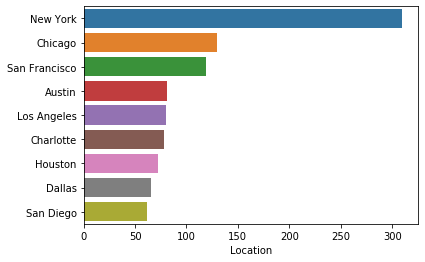

In [56]:
sns.barplot(x=df['Location'].value_counts()[0:9],y=df['Location'].value_counts()[0:9].index)

Text(0, 0.5, 'No.of Companies')

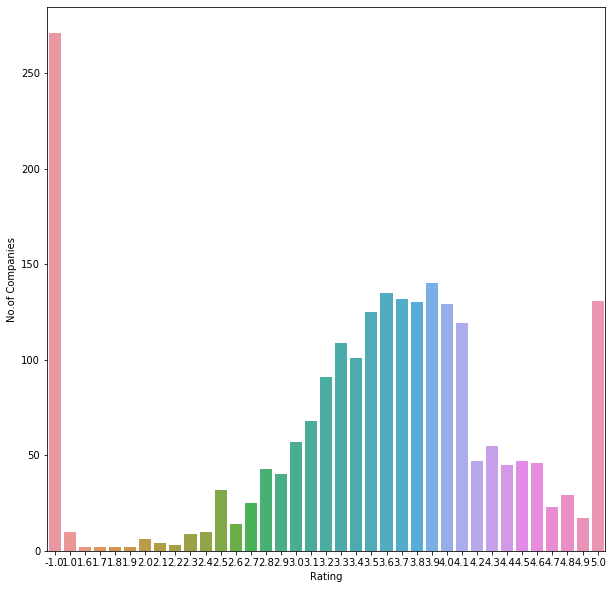

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('No.of Companies')

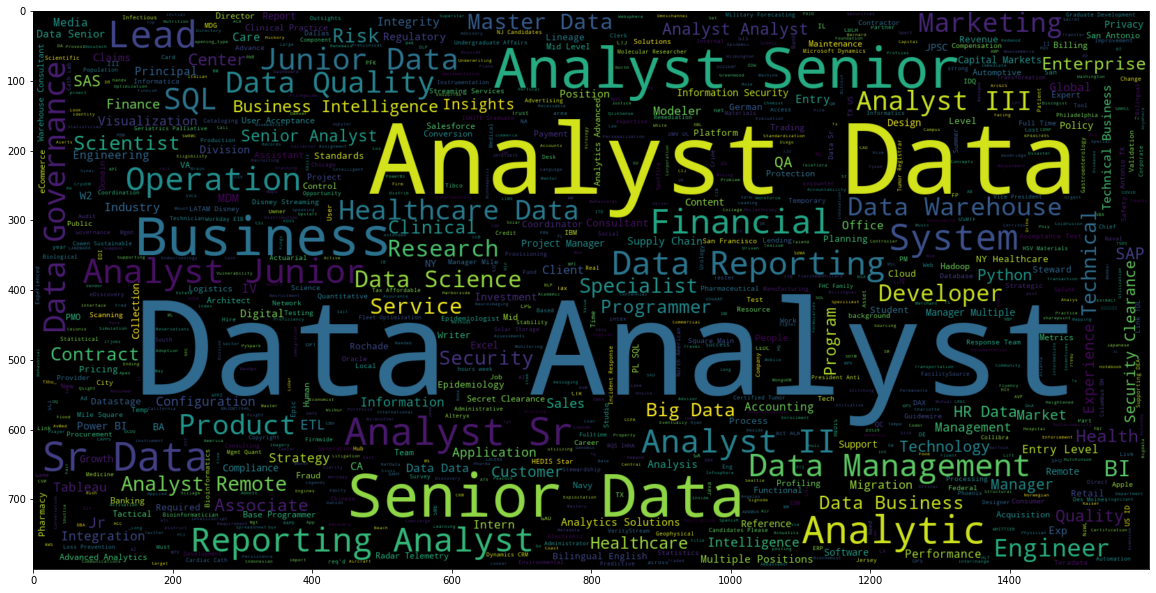

In [58]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Job Title']))
plt.imshow(wc , interpolation = 'bilinear')

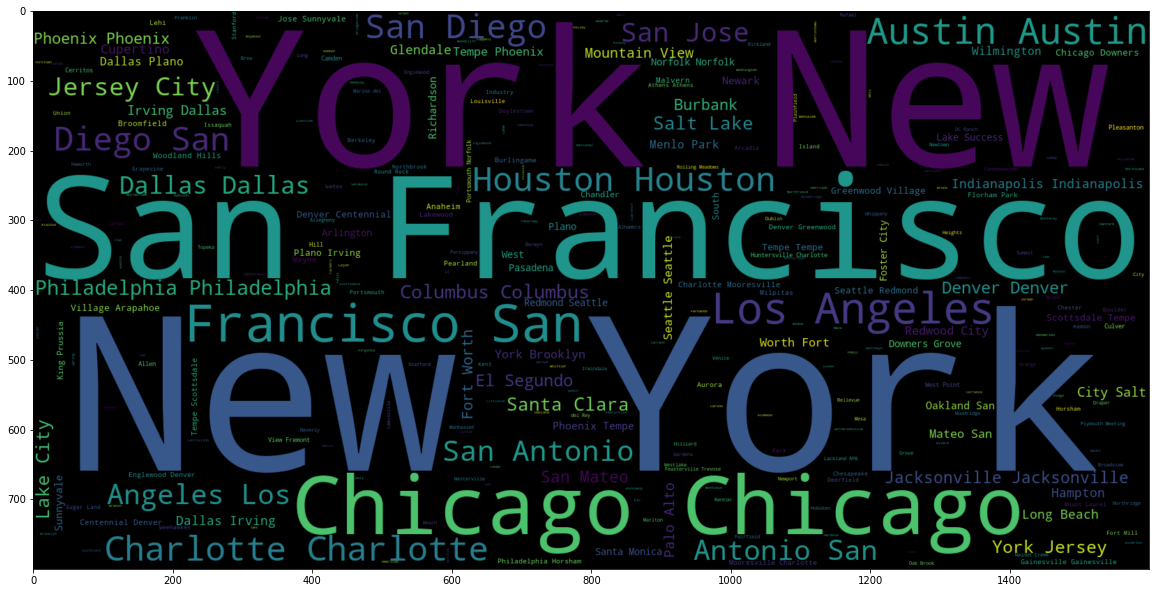

In [59]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Location']))
plt.imshow(wc , interpolation = 'bilinear')

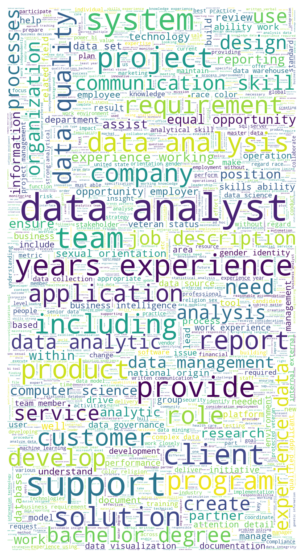

In [60]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

Text(0, 0.5, 'No.of Companies')

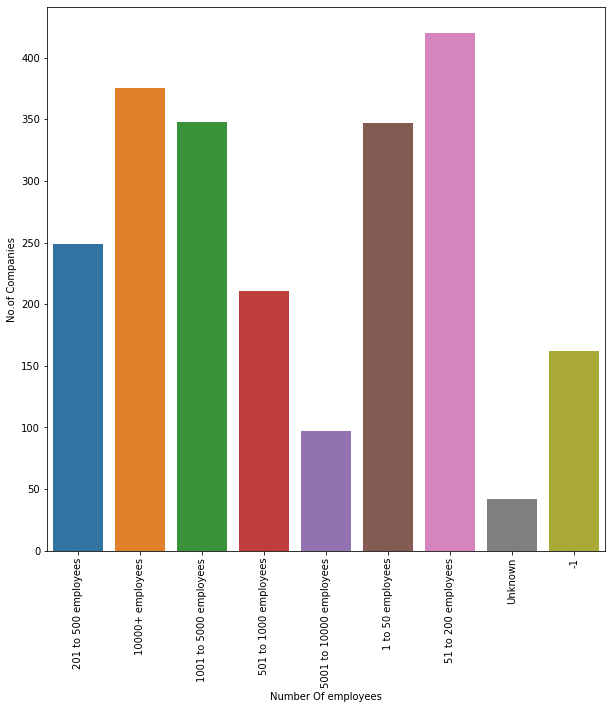

In [61]:
plt.figure(figsize=(10,10))
sns.countplot(df['Size'])
plt.xticks(rotation=90)
plt.xlabel('Number Of employees')
plt.ylabel('No.of Companies')

In [62]:
cor = df[['Average Salary', 'Rating','Desc_len']].corr()

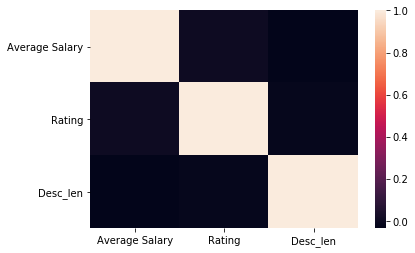

In [63]:
sns.heatmap(cor)

In [64]:
pd.set_option('display.max_rows',None)

In [65]:
pd.pivot_table(df, index=['Jobs','Senior_Jobs'],values='Average Salary')

Average Salary
Jobs           Senior_Jobs                
data analyst   junior            62.742424
               nan               71.900239
               senior            75.182336
data scientist nan               62.888889
               senior            84.400000
de             nan               76.714286
               senior            63.500000
manager        nan               87.500000
nan            junior            66.142857
               nan               70.461538
               senior            71.938596

In [66]:
pd.pivot_table(df, index=['Location'],values='Average Salary').sort_values('Average Salary', ascending = False)

Average Salary
Location                                   
Daly City                        126.000000
Marin City                       126.000000
Los Gatos                        122.666667
Whittier                         122.000000
Pico Rivera                      122.000000
Berkeley                         115.000000
Glenview                         113.000000
Northfield                       113.000000
Elk Grove Village                113.000000
Maywood                          113.000000
San Jose                         108.763158
Woodbridge                       106.000000
Great Neck                       106.000000
Hoboken                          106.000000
Cupertino                        105.769231
City of Industry                 105.666667
West Orange                      105.000000
Santa Clara                      104.454545
Secaucus                         104.000000
Far Rockaway                     104.000000
Sunnyvale                        102.687500
Menlo Park                       101.727273
Gardena                          100.500000
Arcadia                           99.333333
San Bruno                         99.000000
Emeryville                        99.000000
Novato                            99.000000
National City                     99.000000
San Francisco                     98.974790
Spring                            98.000000
Stanford                          98.000000
Redwood City                      96.916667
Fremont                           96.800000
Rolling Meadows                   96.000000
Palo Alto                         93.714286
Oakland                           92.545455
Hercules                          92.000000
El Cajon                          92.000000
Millbrae                          92.000000
Florham Park                      91.800000
San Diego                         91.419355
Woodland Hills                    91.166667
San Mateo                         90.777778
Mountain View                     90.066667
Deerfield                         89.666667
Campbell                          89.000000
Whippany                          89.000000
Parsippany                        89.000000
Boothwyn                          88.000000
Newtown Square                    88.000000
Norristown                        88.000000
Burlingame                        87.000000
Valley Stream                     87.000000
Long Island City                  86.500000
Newark                            86.100000
Sugar Land                        85.666667
Foster City                       85.222222
Broomfield                        83.166667
Aurora                            81.600000
Brea                              81.000000
Fort Sam Houston                  81.000000
Burbank                           80.705882
Long Beach                        80.615385
Fort Eustis                       80.000000
West Point                        79.500000
Marlton                           79.500000
Manhasset                         79.500000
Centennial                        79.333333
Burr Ridge                        79.000000
Des Plaines                       79.000000
Inglewood                         79.000000
Itasca                            79.000000
Northlake                         79.000000
Hermosa Beach                     79.000000
Chicago                           78.492308
Kirkland                          78.000000
Littleton                         78.000000
Pearland                          77.600000
Pleasanton                        77.000000
Arlington Heights                 77.000000
Northridge                        76.500000
South San Francisco               76.333333
Louisville                        75.333333
Milpitas                          74.400000
Union City                        74.000000
Lake Success                      73.666667
Santa Monica                      73.555556
Plymouth Meeting                  73.500000
Camden                            73.500000
Signal Hill              

In [67]:
pd.pivot_table(df, index=['State'],values='Average Salary').sort_values('Average Salary', ascending = False)

Average Salary
State                
 CA         88.250799
 IL         78.085366
 CO         73.364583
 NJ         72.744186
 NY         71.142029
 AZ         70.432990
 SC         68.000000
 NC         67.876404
 VA         65.000000
 WA         64.754717
 PA         61.342105
 DE         59.363636
 TX         58.456853
 FL         51.851852
 KS         51.000000
 IN         47.000000
 OH         45.200000
 GA         44.000000
 UT         37.090909

In [68]:
pd.pivot_table(df, index=['State','Jobs'],values='Average Salary',aggfunc ='count').sort_values('State', ascending = False)

Average Salary
State Jobs                          
 WA   nan                         10
      data analyst                43
 VA   nan                         18
      data analyst                30
 UT   nan                          4
      de                           1
      data scientist               1
      data analyst                27
 TX   de                           2
      data scientist               3
      data analyst               269
      nan                        120
 SC   data analyst                 3
 PA   nan                         20
      manager                      1
      de                           1
      data analyst                92
 OH   nan                          7
      data scientist               2
      data analyst                26
 NY   nan                        102
      manager                      1
      data scientist               2
      data analyst               240
 NJ   nan                         27
      data scientist               1
      data analyst                58
 NC   nan                         26
      de                           1
      data analyst                62
 KS   nan                          1
      data analyst                 2
 IN   data analyst                23
 IL   data analyst               130
      nan                         30
      de                           2
      data scientist               2
 GA   data analyst                 4
 FL   nan                          8
      data analyst                19
 DE   nan                          4
      data analyst                 7
 CO   nan                         28
      data analyst                68
 CA   data analyst               496
      nan                        119
      manager                      4
      de                           4
      data scientist               3
 AZ   nan                         26
      data analyst                71

In [69]:
pd.pivot_table(df, index=['Location','Jobs'],values='Average Salary').sort_values('Location', ascending = False)

Average Salary
Location                    Jobs                          
Yorktown                    nan                  56.000000
Woodridge                   data analyst         68.000000
Woodland Hills              nan                  54.000000
                            data analyst        109.750000
Woodcliff Lake              nan                  72.000000
Woodbridge                  nan                 106.000000
Wilmington                  nan                  66.500000
                            data analyst         55.285714
Whittier                    data analyst        122.000000
Whitestown                  data analyst         47.000000
Whippany                    data analyst         89.000000
Westlake                    nan                  51.000000
                            data analyst         63.000000
Westerville                 data analyst         53.000000
West Point                  data analyst         79.500000
West Orange                 data analyst        105.000000
West Lake Hills             data analyst         38.000000
West Jordan                 data analyst         36.000000
West Conshohocken           data analyst         53.000000
West Chester                data analyst         40.000000
Weehawken                   data scientist       66.000000
                            data analyst         59.000000
                            nan                  85.000000
Wayne                       nan                  67.250000
                            data analyst         70.500000
Walnut Creek                nan                  60.000000
Visalia                     data analyst         64.000000
Virginia Beach              data analyst         56.000000
Venice                      data analyst         66.500000
Valley Stream               data analyst         87.000000
Union City                  data analyst         74.000000
Torrance                    data analyst         54.000000
Topeka                      data analyst         51.000000
Tempe                       nan                  71.111111
                            data analyst         68.818182
Tarrant                     nan                  63.000000
Sunnyvale                   nan                  79.250000
                            manager              98.000000
                            data analyst        111.636364
Summit                      data analyst         69.500000
Sugar Land                  nan                  61.000000
                            data analyst         98.000000
Suffolk                     data analyst         56.000000
Staten Island               nan                  72.000000
Stanford                    data analyst         98.000000
Stafford                    data analyst         33.000000
Spring                      data analyst         98.000000
Southlake                   data analyst         63.000000
South San Francisco         nan                  70.666667
                            data analyst         82.000000
South Plainfield            data analyst         62.000000
Smithfield                  nan                  56.000000
Signal Hill                 data analyst         73.000000
Secaucus                    nan                 104.000000
Seattle                     nan                  67.200000
                            data analyst         63.960000
Scottsdale                  nan                  64.500000
                            data analyst         71.363636
Santa Monica                nan                  40.000000
                            data analyst         77.750000
Santa Clara                 nan                  79.666667
                            de                   98.000000
                            data scientist      120.000000
                            data analyst        108.294118
Sandy                       data analyst         36.000000
San Ramon                   data analyst         72.666667
San Rafael                  nan 

In [70]:
pd.pivot_table(df, index=['HQ_State'],values='Average Salary').sort_values('Average Salary', ascending = False)

Average Salary
HQ_State                
zil           150.000000
wan           122.000000
 NV           112.000000
061            98.000000
ria            92.000000
urg            88.000000
 PR            87.500000
 KY            86.000000
 CA            82.787097
gal            82.500000
 LA            82.333333
 IA            81.000000
rea            80.000000
 ME            78.500000
nds            78.000000
 VT            77.000000
 AK            77.000000
 NJ            76.957317
 OR            76.666667
 WI            76.400000
 MI            76.333333
ore            75.285714
 TN            75.000000
 MA            74.000000
Nan            72.877193
 GA            72.062500
nce            72.000000
 MD            71.512195
 AZ            70.800000
 WA            70.437500
 MO            70.300000
 OK            70.250000
 IL            70.158537
dia            70.111111
 CO            70.034483
 RI            70.000000
 DC            69.555556
dom            69.413793
 VA            68.049020
 KS            68.000000
 HI            68.000000
 NY            67.976285
pan            67.857143
 DE            67.000000
 NC            66.300000
ine            66.000000
any            65.600000
 NE            65.500000
 FL            64.137931
 TX            62.827778
 PA            62.752941
 MN            61.666667
 AR            61.000000
 AL            60.800000
 OH            59.812500
 CT            59.666667
ada            59.384615
 NH            59.000000
rus            59.000000
and            58.545455
lta            58.000000
 IN            56.090909
 SC            55.285714
 WV            53.000000
lia            52.000000
 UT            42.454545
way            33.000000
 MS            33.000000

In [71]:
pd.pivot_table(df, index=['HQ_State','Jobs'],values='Average Salary').sort_values('HQ_State', ascending = False)

Average Salary
HQ_State Jobs                          
zil      data analyst        150.000000
way      data analyst         33.000000
wan      data analyst        122.000000
urg      data analyst         88.000000
rus      data analyst         59.000000
ria      data analyst         92.000000
rea      data analyst         80.000000
pan      nan                  66.200000
         data analyst         68.777778
ore      nan                  60.666667
         data analyst         86.250000
nds      nan                  78.000000
nce      data analyst         75.300000
         nan                  75.000000
         data scientist       36.000000
lta      data analyst         58.000000
lia      data analyst         52.000000
ine      data analyst         66.000000
gal      nan                 106.000000
         data analyst         59.000000
dom      nan                  74.800000
         data scientist       72.000000
         data analyst         66.277778
dia      nan                  72.111111
         data analyst         69.111111
any      nan                  56.000000
         data analyst         80.000000
and      nan                  71.666667
         data analyst         53.625000
ada      data analyst         63.375000
         nan                  53.000000
Nan      data scientist       39.500000
         data analyst         73.384058
         nan                  71.933333
         manager              98.000000
061      data analyst         98.000000
 WV      data analyst         53.000000
 WI      nan                  40.000000
         de                   88.000000
         data analyst         84.666667
 WA      nan                  70.285714
         data analyst         70.480000
 VT      nan                  77.000000
 VA      nan                  72.322581
         manager              95.500000
         data analyst         65.333333
 UT      nan                  38.000000
         data analyst         43.444444
 TX      de                   70.500000
         data analyst         62.387597
         nan                  63.673469
 TN      nan                  81.500000
         de                   68.000000
         data analyst         74.538462
 SC      nan                  38.000000
         data analyst         58.166667
 RI      nan                  79.500000
         data analyst         60.500000
 PR      data analyst         87.500000
 PA      nan                  65.444444
         data scientist       77.000000
         data analyst         61.803030
 OR      data analyst         78.000000
         nan                  76.000000
 OK      data analyst         70.250000
 OH      nan                  61.888889
         data analyst         59.000000
 NY      nan                  66.923077
         data scientist       69.000000
         data analyst         68.439306
 NV      nan                  74.000000
         data analyst        150.000000
 NJ      nan                  76.918919
         data analyst         76.968504
 NH      data analyst         59.000000
 NE      data analyst         65.500000
 NC      data analyst         64.681818
         nan                  69.750000
         de                   56.500000
 MS      data analyst         33.000000
 MO      nan                  38.000000
         data analyst         72.000000
 MN      nan                  62.000000
         data analyst         61.600000
 MI      nan                  85.500000
         data analyst         73.512821
 ME      data analyst         78.500000
 MD      nan                  70.900000
         data analyst         71.709677
 MA      nan                  64.875000
         data analyst         78.562500
 LA      nan                  78.000000
         data analyst         84.500000
 KY      nan                  60.000000
         data analyst        138.000000
 KS      data analyst         66.000000
         nan                  72.000000
 IN      nan                  89.000000
         data analyst    

In [72]:
pd.pivot_table(df[df['Jobs']=='data scientist'], index='State',values='Average Salary').sort_values('State', ascending = False)

Average Salary
State                
 UT         36.000000
 TX         38.333333
 OH         40.000000
 NY         72.000000
 NJ         66.000000
 IL         95.000000
 CA        119.000000

In [73]:
pd.pivot_table(df[df['Jobs']=='data scientist'], index='HQ_State',values='Average Salary').sort_values('HQ_State', ascending = False)

Average Salary
HQ_State                
nce            36.000000
dom            72.000000
Nan            39.500000
 PA            77.000000
 NY            69.000000
 IL            64.333333
 GA            36.000000
 CA           119.000000

In [74]:
pd.pivot_table(df[df['Jobs']=='data analyst'], index='State',values='Average Salary').sort_values('State', ascending = False)

Average Salary
State                
 WA         63.558140
 VA         64.000000
 UT         36.666667
 TX         56.527881
 SC         68.000000
 PA         61.358696
 OH         45.000000
 NY         69.612500
 NJ         73.896552
 NC         68.370968
 KS         51.000000
 IN         47.000000
 IL         76.707692
 GA         44.000000
 FL         52.315789
 DE         55.285714
 CO         71.647059
 CA         90.604839
 AZ         70.380282

In [75]:
pd.pivot_table(df[df['Jobs']=='data analyst'], index='HQ_State',values='Average Salary').sort_values('HQ_State', ascending = False)

Average Salary
HQ_State                
zil           150.000000
way            33.000000
wan           122.000000
urg            88.000000
rus            59.000000
ria            92.000000
rea            80.000000
pan            68.777778
ore            86.250000
nce            75.300000
lta            58.000000
lia            52.000000
ine            66.000000
gal            59.000000
dom            66.277778
dia            69.111111
any            80.000000
and            53.625000
ada            63.375000
Nan            73.384058
061            98.000000
 WV            53.000000
 WI            84.666667
 WA            70.480000
 VA            65.333333
 UT            43.444444
 TX            62.387597
 TN            74.538462
 SC            58.166667
 RI            60.500000
 PR            87.500000
 PA            61.803030
 OR            78.000000
 OK            70.250000
 OH            59.000000
 NY            68.439306
 NV           150.000000
 NJ            76.968504
 NH            59.000000
 NE            65.500000
 NC            64.681818
 MS            33.000000
 MO            72.000000
 MN            61.600000
 MI            73.512821
 ME            78.500000
 MD            71.709677
 MA            78.562500
 LA            84.500000
 KY           138.000000
 KS            66.000000
 IN            48.777778
 IL            69.023077
 IA            81.000000
 HI            68.000000
 GA            70.000000
 FL            64.309524
 DE            67.000000
 DC            71.000000
 CT            59.750000
 CO            69.695652
 CA            84.717087
 AZ            70.761905
 AR            61.000000
 AL            59.000000

In [76]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Average Salary', 'State', 'HQ_State',
       'Same_State', 'Jobs', 'Senior_Jobs', 'num_comp', 'Desc_len'],
      dtype='object')

In [77]:
df_model = df[['Average Salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp',
             'State','Same_State','Jobs','Senior_Jobs','Desc_len']]

# get dummy data 
dum = pd.get_dummies(df_model)

In [78]:
dum

Average Salary  Rating  num_comp  Same_State  Desc_len  Size_-1  \
0                 51     3.2         0           1      7057        0   
1                 51     3.8         0           1      4702        0   
2                 51     3.4         1           1      4688        0   
3                 51     4.1         0           0      5249        0   
4                 51     3.9         1           1      3376        0   
5                 51     3.9         0           0      2611        0   
6                 51     4.4         0           1      3143        0   
7                 51     3.7         3           1      1639        0   
8                 51     4.0         3           0      3342        0   
9                 51     4.4         2           1      3468        0   
10                51     4.0         2           1      4619        0   
11                51    -1.0         0           0      5625        0   
12                51     3.7         0           1      3242        0   
13                51     3.0         0           1      2960        0   
14                51     3.4         0           0      3723        0   
15                51     3.6         0           1      2401        0   
16                51     3.8         3           1      2550        0   
17                51     3.8         3           1      3889        0   
18                51     3.9         0           0      4149        0   
19                51     4.9         0           1      4465        0   
20                51     4.4         3           0      3213        0   
21                51    -1.0         0           0       816        0   
22                51     3.3         3           0      2927        0   
23                51     3.5         0           0      3479        0   
24                51     3.8         0           0      1129        0   
25                51     4.0         0           0      1959        0   
26                51     5.0         0           0      2951        0   
27                51     4.8         0           1      4170        0   
28                51     3.7         0           1      3458        0   
29                51     4.7         0           0      3588        0   
30                66     3.6         0           0      2719        0   
31                66     3.6         0           0       255        0   
32                66     3.5         0           0       462        0   
33                66     3.2         0           0      4384        0   
34                66    -1.0         0           0      2158        1   
35                66     3.7         0           0      2952        0   
36                66    -1.0         0           1      2896        0   
37                66     3.6         0           0      3288        0   
38                66     4.0         2           1      4967        0   
39                66     4.6         0           0      3747        0   
40                66    -1.0         0           1      5662        0   
41                66    -1.0         0           0      2718        0   
42                66     5.0         0           0      1795        0   
43                66     4.0         0           0      1095        0   
44                66     3.0         3           1      5916        0   
45                66     2.9         0           0      2432        0   
46                66     4.0         0           0      2091        0   
47                66     3.6         3           1      4851        0   
48                66     4.9         0           1      2197        0   
49                66     3.9         0           0      2134        0   
50                66     4.0         3           0      5534        0   
51                66     3.8         3           0      3274        0   
52                66     3.7         3           0      6119        0   
53                66     3.6         0           1      3752    

In [79]:
X = dum.drop('Average Salary', axis =1)
y = dum['Average Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


C:\Users\Acer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average Salary   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     6.964
Date:                Sun, 09 Aug 2020   Prob (F-statistic):          1.64e-102
Time:                        16:30:24   Log-Likelihood:                -9861.6
No. Observations:                2251   AIC:                         2.002e+04
Df Residuals:                    2101   BIC:                         2.088e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 31.9663      2.116     15.110      0.000      27.818      36.115
Rating                                                 0.2283      0.424      0.539      0.590      -0.603       1.059
num_comp                                              -0.9389      0.457     -2.056      0.040      -1.834      -0.043
Same_State                                            -0.5854      1.097     -0.534      0.594      -2.736       1.565
Desc_len                                              -0.0005      0.000     -1.842      0.066      -0.001    3.22e-05
Size_-1                                                3.5418      1.015      3.490      0.000       1.552       5.532
Size_1 to 50 employees                                 1.6514      1.558      1.060      0.289      -1.404       4.707
Size_10000+ employees                                  4.1002      1.884      2.176      0.030       0.405       7.796
Size_1001 to 5000 employees                            5.8940      1.372      4.297      0.000       3.204       8.584
Size_201 to 500 employees                              1.8411      1.482      1.242      0.214      -1.065       4.747
Size_5001 to 10000 employees                           5.3671      2.212      2.426      0.015       1.029       9.705
Size_501 to 1000 employees                             3.1553      1.593      1.981      0.048       0.032       6.278
Size_51 to 200 employees                               4.2281      1.318      3.209      0.001       1.644       6.812
Size_Unknown                                           2.1873      3.133      0.698      0.485      -3.956       8.331
Type of ownership_-1                                   3.5418      1.015      3.490      0.000       1.552       5.532
Type of ownership_College / University                12.9892      6.978      1.862      0.063      -0.695      26.673
Type of ownership_Company - Private                    1.7369      2.298      0.756      0.450      -2.769       6.243
Type of ownership_Company - Public                     2.5465      2.508      1.015      0.310      -2.372       7.465
Type of ownership_Contract                             4.7760      6.090      0.784      0.433      -7.167      16.719
Type of ownership_Franchise                            1.0368     14.815      0.070      0.944     -28.018      30.091
Type of ownership_Government                          -4.1031      6.223     -0.659      0.510     -16.307       8.100
Type of ownership_Hospital                             6.9977      5.228      1.338      0.181      -3.255      17.251
Type of ownership_Nonprofit Organization               0.0832      2.928      0.028      0.977      -5.658  

In [131]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
# mean = mean_absolute_error(y_train,y_pred) 
np.mean(cross_val_score(lm,X_train,y_train,scoring ='neg_mean_absolute_error', cv = 3))
# score = lm.score(X_train,y_train)

-41701359.30372488

In [82]:
log = LogisticRegression()
log.fit(X_train,y_train)
np.mean(cross_val_score(log,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

# score = log.score(X_train,y_train)
# acc = accuracy_score(y_train,y_pred)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.p

-18.1450267418265

In [133]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
y_pred1 = lm_l.predict(X_test)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-15.225646228772364

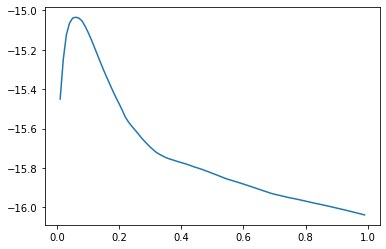

In [84]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)


In [152]:
ran = RandomForestRegressor()
ran.fit(X_train,y_train)
y_pred3 = ran.predict(X_test)
np.mean(cross_val_score(ran,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-15.88423968253968

In [86]:
rand = RandomForestClassifier()
ran.fit(X_train,y_train)
np.mean(cross_val_score(rand,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-19.085367878657696

In [87]:
parameters = {'n_estimators':range(10,30,3), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gd = GridSearchCV(ran,parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gd.fit(X_train,y_train)
gd.best_score_


-15.566564625850338

In [88]:
gd.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=28,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [143]:
parameters1 = {'alpha':[0.001, 0.002, 0.005, 0.06, 0.003]}
gd1 = GridSearchCV(lm_l,parameters1, scoring = 'neg_mean_absolute_error', cv = 3)
gd1.fit(X_train,y_train)
y_pred2 = gd1.predict(X_test)
gd1.best_score_


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418.43033793376526, tolerance: 58.52022514285716
  positive)


-15.03515317192995

In [120]:
gd1.best_estimator_

Lasso(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [138]:
lm1 = mean_absolute_error(y_test,y_pred)
lm1

17273421.389091615

In [139]:
lm_l1 = mean_absolute_error(y_test,y_pred1)
lm_l1

15.956893897760462

In [144]:
gd_1 = mean_absolute_error(y_test,y_pred2)
gd_1

15.866489419480388

In [153]:
ran1 = mean_absolute_error(y_test,y_pred3)
ran1

16.71561249647788

In [155]:
mean_absolute_error(y_test,(ran1+gd_1)/2).astype('int')

TypeError: Singleton array 16.291050957979134 cannot be considered a valid collection.